In [1]:
import os
import pickle

In [2]:
OUTPUTS = [
    'FLOW_OUTcms', 'EVAPcms', 'TLOSScms', 'SED_OUTtons', 'SEDCONCmgL',
    'ORGN_OUTkg', 'ORGP_OUTkg', 'NO3_OUTkg', 'NH4_OUTkg', 'NO2_OUTkg',
    'MINP_OUTkg', 'CHLA_OUTkg', 'CBOD_OUTkg', 'DISOX_OUTkg', 'TOTNkg'
]
models = {}
for model in OUTPUTS:
    loaded_model = pickle.load(open('models/{0}.pkl'.format(model), 'rb'))
    models[model] = loaded_model

/Users/kevin/.local/share/virtualenvs/watershed-EG5ajtUt/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/kevin/.local/share/virtualenvs/watershed-EG5ajtUt/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [9]:
defaults = {
  'PCP19': 968.87098826979434, 'PCP18': 968.87087096774121, 'FOREST_COVER8': 30.979363636363608, 'FOREST_COVER9': 13.894272727272725, 'FOREST_COVER4': 25.282454545454488, 'FOREST_COVER5': 46.156454545454629, 'PCP11': 1012.6645219941356, 'FOREST_COVER7': 20.889454545454551, 'PCP17': 968.87129618768347, 'FOREST_COVER1': 21.885636363636419, 'FOREST_COVER2': 25.62436363636364, 'FOREST_COVER3': 39.635181818181813, 'PCP31': 966.92223460410582, 'PCP30': 966.92276539589443, 'PCP13': 1012.6645161290332, 'FOREST_COVER18': 7.2060909090909009, 'PCP12': 968.87074486803454, 'FOREST_COVER16': 13.745181818181807, 'FOREST_COVER17': 21.688000000000105, 'FOREST_COVER14': 10.790181818181839, 'FOREST_COVER15': 12.90781818181812, 'FOREST_COVER12': 25.736999999999956, 'FOREST_COVER6': 70.961545454545742, 'FOREST_COVER10': 49.740181818181782, 'FOREST_COVER11': 27.190272727272706, 'PCP10': 968.87102932551318, 'PCP21': 968.87081524926612, 'PCP28': 966.92196774193599, 'PCP29': 966.92293841642288, 'PCP26': 966.92227859237562, 'PCP27': 966.92299706744961, 'PCP24': 968.87160117302165, 'FOREST_COVER19': 12.413727272727275, 'PCP22': 1012.6642785923761, 'PCP23': 968.87065689149472, 'PCP20': 1012.664906158359, 'PCP16': 968.87065102639247, 'FOREST_COVER30': 48.358909090908917, 'PCP15': 968.87129912023465, 'FOREST_COVER31': 45.663909090909151, 'PCP14': 1012.6642287390029, 'FOREST_COVER29': 34.556181818181777, 'PCP9': 1012.6642609970676, 'PCP8': 1012.664524926687, 'PCP7': 1012.6645102639308, 'PCP6': 1042.3405923753669, 'PCP5': 1012.664724340177, 'PCP4': 1012.6642991202351, 'PCP3': 1012.664307917889, 'PCP2': 1012.6649648093858, 'PCP1': 1012.6644868035196, 'FOREST_COVER13': 54.1667272727274, 'FOREST_COVER27': 36.154727272727321, 'FOREST_COVER26': 9.7670000000000332, 'FOREST_COVER25': 14.56472727272728, 'FOREST_COVER24': 23.29572727272727, 'FOREST_COVER23': 9.2115454545454476, 'FOREST_COVER22': 28.020909090909122, 'FOREST_COVER21': 33.041999999999959, 'FOREST_COVER20': 3.6105454545454609, 'PCP25': 1006.3815014662775, 'FOREST_COVER28': 19.144000000000037
}

In [10]:
def _reorder(features: dict) -> list:
    '''Reorder to same order as dfx in model.
    '''
    p = 1
    q = 31
    l = []
    while p <= q:
        l.append(
            float(features['FOREST_COVER' + str(p)])
        )
        l.append(
            float(features['PCP' + str(p)])
        )
        p += 1
    return l

In [11]:
import numpy as np

In [12]:
np.linspace(-0.5,0.5,21)

array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
       -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
        0.4 ,  0.45,  0.5 ])

In [27]:
d = {}
linearspace = np.linspace(-0.5,0.5,21)
# d['change'] = np.linspace(-0.5,0.5,21)
for name, model in models.items():
    y = []
    baseline = model.predict([_reorder(defaults)])
    for change in linearspace:
        modified = dict(defaults)
        for k, v in modified.items():
            if k.startswith('FOREST'):
                modified[k] = v + v * change
        #
        prediction = model.predict([_reorder(modified)])
        diff = (prediction - baseline) / baseline
        y.append(diff[0])
    d[name] = y

In [28]:
d

{'FLOW_OUTcms': [-0.08359892381435288,
  -0.07892355943013817,
  -0.0771594632803387,
  -0.0771594632803387,
  -0.0771594632803387,
  -0.0771594632803387,
  -0.033188987291282855,
  -0.020964137508834232,
  -0.013635317354300364,
  -0.013635317354300364,
  0.0,
  0.05276735558153752,
  0.05276735558153752,
  0.08867928184978513,
  0.11716395870982084,
  0.14085009824380615,
  0.14085009824380615,
  0.14085009824380615,
  0.14085009824380615,
  0.14085009824380615,
  0.14085009824380615],
 'EVAPcms': [-0.019781199807191584,
  -0.018225972694854663,
  -0.013043771887613,
  -0.006709796005543338,
  -0.006709796005543338,
  -0.005537723611572804,
  -0.00453767479946717,
  -0.003961874844744737,
  -0.0019095563139947872,
  -0.00290549323413083,
  0.0,
  0.0012314872286102844,
  0.0009657440930581231,
  0.0009657440930581231,
  0.0009657440930581231,
  0.0009657440930581231,
  0.003934149395796194,
  0.009124319863550074,
  0.009015496972310763,
  0.009015496972310763,
  0.01443042114711335]

In [21]:
import pandas as pd

In [29]:
df = pd.DataFrame(d, linearspace)

In [30]:
df

,FLOW_OUTcms,EVAPcms,TLOSScms,SED_OUTtons,SEDCONCmgL,ORGN_OUTkg,ORGP_OUTkg,NO3_OUTkg,NH4_OUTkg,NO2_OUTkg,MINP_OUTkg,CHLA_OUTkg,CBOD_OUTkg,DISOX_OUTkg,TOTNkg
-0.50,-0.083599,-0.019781,0.009939,-0.013326,0.018919,0.030991,0.214301,0.026809,0.012972,0.075604,0.033083,0.019390,-0.032762,0.108992,0.035226
-0.45,-0.078924,-0.018226,0.006595,-0.010226,0.018919,0.030991,0.129301,0.023337,0.017893,0.060939,0.031474,0.016341,-0.024364,0.063468,0.035226
-0.40,-0.077159,-0.013044,0.004900,-0.010226,0.013937,0.005608,0.103909,0.019592,0.017893,0.035879,0.020446,0.011359,-0.020876,0.032885,0.024893
-0.35,-0.077159,-0.006710,0.004900,-0.010226,0.013937,0.005608,0.103909,0.019592,0.016234,0.035879,0.020446,0.011359,-0.020876,0.032885,0.020300
-0.30,-0.077159,-0.006710,0.003901,-0.010226,0.013937,0.005608,0.103909,0.019592,0.016234,0.035879,0.020954,0.011359,-0.020876,0.032885,0.020300
-0.25,-0.077159,-0.005538,0.003901,-0.010226,0.013937,0.007118,0.101114,0.019592,0.016234,0.037045,0.020954,0.008358,-0.020876,0.032585,0.020300
-0.20,-0.033189,-0.004538,0.003809,-0.009305,0.013937,0.006518,0.095566,0.016107,0.011210,0.037045,0.014724,0.007474,-0.019476,0.031203,0.014057
-0.15,-0.020964,-0.003962,0.002323,-0.008799,0.003909,0.001444,0.086318,0.013016,0.010141,0.021894,0.008136,0.009519,-0.018114,0.009190,0.013328
-0.10,-0.013635,-0.001910,0.001590,-0.008799,0.003444,0.001433,0.019483,0.012375,0.006368,0.007949,0.005520,0.005300,-0.015355,0.009190,0.012600
-0.05,-0.013635,-0.002905,0.001192,-0.008799,0.001890,0.000711,0.014108,0.009965,0.001232,0.009199,0.000353,0.002667,-0.000790,0.007154,0.005212


In [31]:
df.to_csv('results/predictions.csv')

In [77]:
df.describe()

,FLOW_OUTcms,EVAPcms,TLOSScms,SED_OUTtons,SEDCONCmgL,ORGN_OUTkg,ORGP_OUTkg,NO3_OUTkg,NH4_OUTkg,NO2_OUTkg,MINP_OUTkg,CHLA_OUTkg,CBOD_OUTkg,DISOX_OUTkg,TOTNkg
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.028757,-0.001558,0.000249,-0.003614,-0.000188,-0.002735,-0.027999,-0.001078,0.003594,0.008429,0.004221,-0.000031,-0.001172,0.018658,-0.003130
std,0.091589,0.008621,0.004790,0.006412,0.013095,0.017378,0.137753,0.020819,0.009957,0.031903,0.015655,0.012246,0.021001,0.031217,0.025434
min,-0.083599,-0.019781,-0.007660,-0.013326,-0.015496,-0.035546,-0.239264,-0.031539,-0.008604,-0.037353,-0.022048,-0.019256,-0.032762,-0.032455,-0.036170
25%,-0.077159,-0.005538,-0.003798,-0.010226,-0.015444,-0.008316,-0.147758,-0.015786,-0.006120,-0.006094,-0.011502,-0.014156,-0.020876,-0.005586,-0.030306
50%,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000159,0.009190,0.000000
75%,0.140850,0.001231,0.003901,0.003439,0.013937,0.005608,0.101114,0.019592,0.012972,0.035879,0.020446,0.009519,0.023563,0.032885,0.020300
max,0.140850,0.014430,0.009939,0.003588,0.018919,0.030991,0.214301,0.026809,0.017893,0.075604,0.033083,0.019390,0.031438,0.108992,0.035226


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")

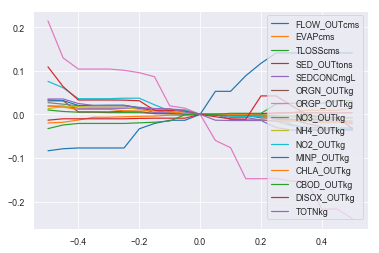

In [75]:
g = sns.lineplot(data=df, palette="tab10", dashes=False)

In [70]:
type(g)

matplotlib.axes._subplots.AxesSubplot

In [71]:
g.set(ylabel="Predicted Change (%)", xlabel="Change in Overall Forest Cover (%)")

[Text(3.1999999999999993, 0.5, 'Predicted Change (%)'),
 Text(0.5, 3.200000000000003, 'Change in Overall Forest Cover (%)')]

In [74]:
g.despine(left=True)
plt.legend(loc='upper left')
g.set_ylabels("Outputs")

AttributeError: 'AxesSubplot' object has no attribute 'despine'

In [66]:
fig = g.get_figure()

In [68]:
fig.savefig('results/predictions_forest.png')